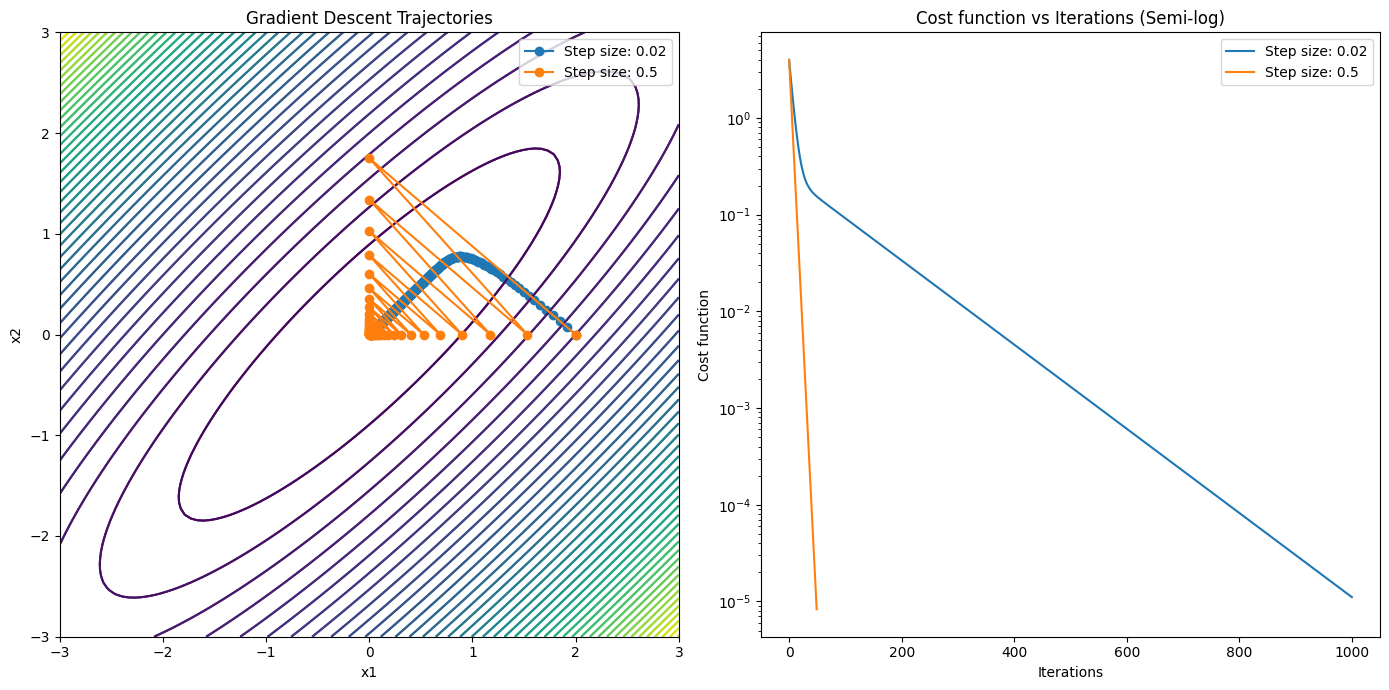

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from utils import * 

# Define parameters
theta = np.pi / 4
gamma = 1 / 8

# Construct A matrix
L = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
D = np.array([[gamma, 0], [0, 2 - gamma]])
A = L @ D @ np.linalg.inv(L)

# Initial point (ensure it's a float array)
x0 = np.array([2, 0], dtype=float)

# Experiment with different step sizes
step_sizes = [0.02,0.5] 


# Plot contours of the cost function
x1_vals = np.linspace(-3, 3, 100)
x2_vals = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = np.array([cost_function(np.array([x1, x2]), A) for x1, x2 in zip(X1.flatten(), X2.flatten())]).reshape(X1.shape)

plt.figure(figsize=(14, 7))
for i, step_size in enumerate(step_sizes):
    x_history, cost_history, num_iters = gradient_descent(A, x0, step_size)
    
    # Plot trajectory
    plt.subplot(1, 2, 1)
    plt.contour(X1, X2, Z, levels=50, cmap='viridis')
    plt.plot(x_history[:, 0], x_history[:, 1], marker='o', label=f'Step size: {step_size}')   
    # Plot cost function vs iterations (semi-logarithmic scale)
    plt.subplot(1, 2, 2)
    plt.plot(np.arange(num_iters + 1), cost_history, label=f'Step size: {step_size}')
    plt.yscale('log')

# Plot settings
plt.subplot(1, 2, 1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Gradient Descent Trajectories')
plt.legend()
plt.subplot(1, 2, 2)
plt.xlabel('Iterations')
plt.ylabel('Cost function')
plt.title('Cost function vs Iterations (Semi-log)')
plt.legend()
plt.tight_layout()
plt.show()